load libearies


In [ ]:
if (!require("psych")) install.packages("psych")
install.packages("scatterplot3d")

Loading required package: psych

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘psych’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load required libraries
library(readr)
library(dplyr)
library(ggplot2)
library(psych)
library(tidyr)
library(scatterplot3d)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




install dataset


In [ ]:
#Install Kaggle
system("pip install kaggle")

In [ ]:
#Load Datasets
system("kaggle datasets list")

In [ ]:
#download dataset Zip File
system("kaggle datasets download -d hasibur013/diabetes-dataset -p /content")

In [ ]:
#Unzip
system("unzip /content/diabetes-dataset.zip -d /content")

analyze dataset


In [ ]:
data <- read.csv("/content/diabetes_dataset.csv")
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
colnames(data)[colnames(data) == "DiabetesPedigreeFunction"] <- "DPF"

head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
total_patients <- nrow(data)
total_patients

[1] 768

In [ ]:
# Calculate the number of patients with diabetes
diabetes_count <- sum(data$Outcome)
diabetes_count

[1] 268

In [ ]:
colSums(is.na(data))  #check if there are any missing values in each column

Pregnancies       Glucose BloodPressure SkinThickness       Insulin 
            0             0             0             0             0 
          BMI           DPF           Age       Outcome 
            0             0             0             0

In [ ]:
# Count and print the number of duplicate rows and Remove fully duplicate rows
duplicate_rows <- nrow(data) - nrow(distinct(data))
if (duplicate_rows > 0) {
  data <- distinct(data)
}
duplicate_rows

[1] 0

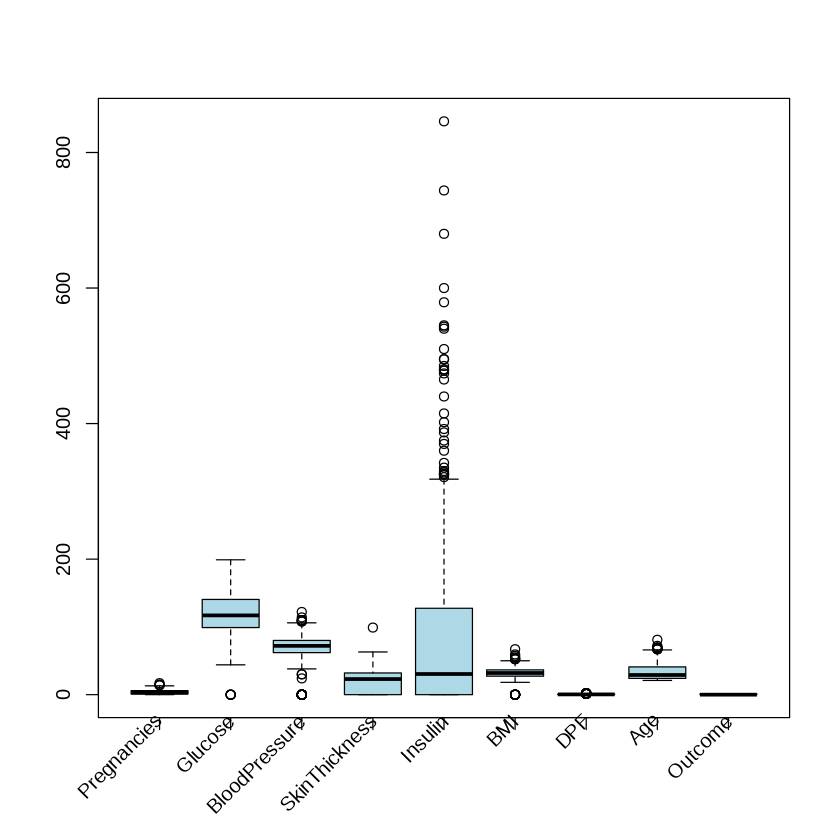

In [ ]:
# Create the boxplot without axis labels
boxplot(data, col = "lightblue", xaxt = "n")

# Add slanted column names at 45 degrees
axis(1, at = 1:ncol(data), labels = FALSE)  # Suppress default labels
text(x = 1:ncol(data), y = par("usr")[3] - 0.5,
     labels = colnames(data), srt = 45, adj = 1, xpd = TRUE)

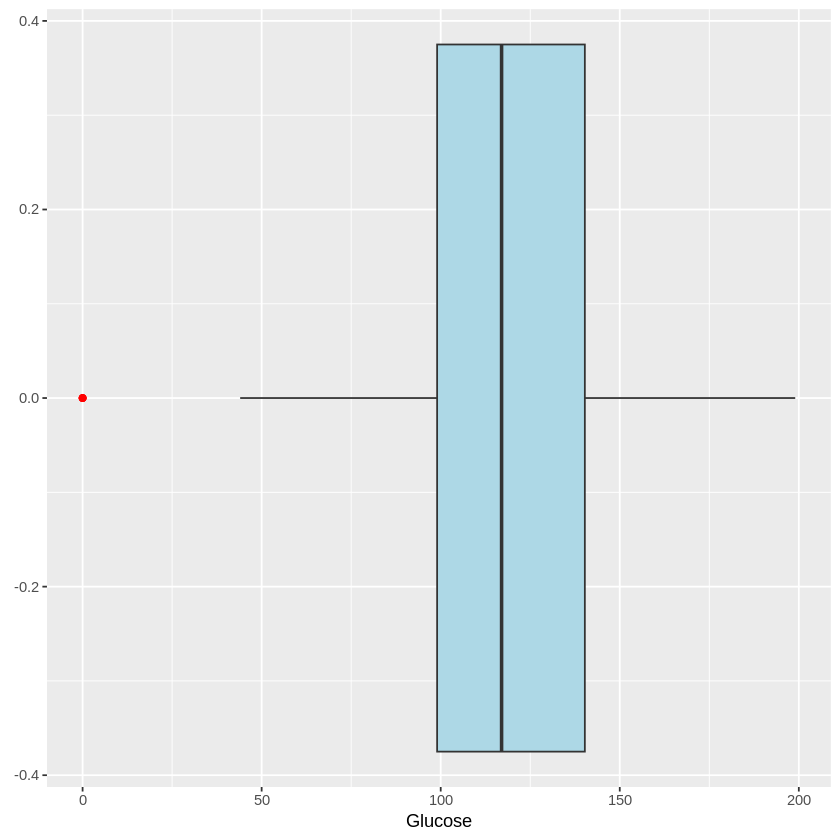

In [ ]:
ggplot(data, aes(x = Glucose)) + geom_boxplot(outlier.colour = "red", fill = "lightblue")

In [ ]:
Q1 <- quantile(data$Insulin, 0.25, na.rm = TRUE)
Q3 <- quantile(data$Insulin, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

outliers <- data$Insulin[data$Insulin < (Q1 - 1.5 * IQR) | data$Insulin > (Q3 + 1.5 * IQR)]
outliers

[1] 543 846 342 495 325 485 495 478 744 370 680 402 375 545 360 325 465 325 415
[20] 579 474 328 480 326 330 600 321 440 540 480 335 387 392 510

In [ ]:
summary(data$Insulin)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0    30.5    79.8   127.2   846.0 

In [ ]:
print(summary(data))

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI             DPF              Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
    Outcome     
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 

handel outliers

In [ ]:
numerical_cols <- names(data)[sapply(data, is.numeric)]
for (col in numerical_cols) {
  Q1 <- quantile(data[[col]], 0.25, na.rm = TRUE)
  Q3 <- quantile(data[[col]], 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  # Cap outliers to boundaries
  data[[col]] <- ifelse(data[[col]] < lower_bound, lower_bound,
                        ifelse(data[[col]] > upper_bound, upper_bound, data[[col]]))
}

In [ ]:
# Summary after cleaning
print("Summary of cleaned data:")
print(summary(data))

[1] "Summary of cleaned data:"
  Pregnancies        Glucose       BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 37.12   Min.   : 35.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.00   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.00   Median : 72.00   Median :23.00  
 Mean   : 3.837   Mean   :121.14   Mean   : 70.68   Mean   :20.51  
 3rd Qu.: 6.000   3rd Qu.:140.25   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :13.500   Max.   :199.00   Max.   :107.00   Max.   :80.00  
    Insulin            BMI             DPF              Age      
 Min.   :  0.00   Min.   :13.35   Min.   :0.0780   Min.   :21.0  
 1st Qu.:  0.00   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.0  
 Median : 30.50   Median :32.00   Median :0.3725   Median :29.0  
 Mean   : 73.65   Mean   :32.13   Mean   :0.4589   Mean   :33.2  
 3rd Qu.:127.25   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.0  
 Max.   :318.12   Max.   :50.55   Max.   :1.2000   Max.   :66.5  
    Outcome     
 Min.   :0.000

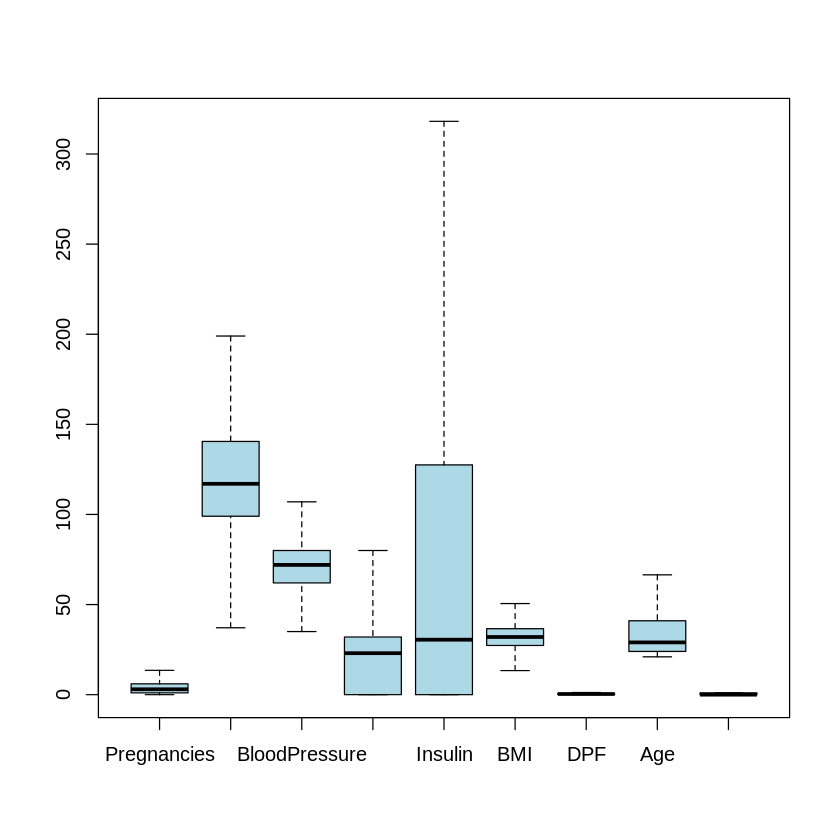

In [ ]:
boxplot(data, col = "lightblue")

answer to questions


In [ ]:
# 1. The average glucose levels among patients with and without diabetes
glucose_stats <- aggregate(Glucose ~ Outcome, data = data, mean)
glucose_stats

Outcome,Glucose
<int>,<dbl>
0,110.2027
1,141.5345


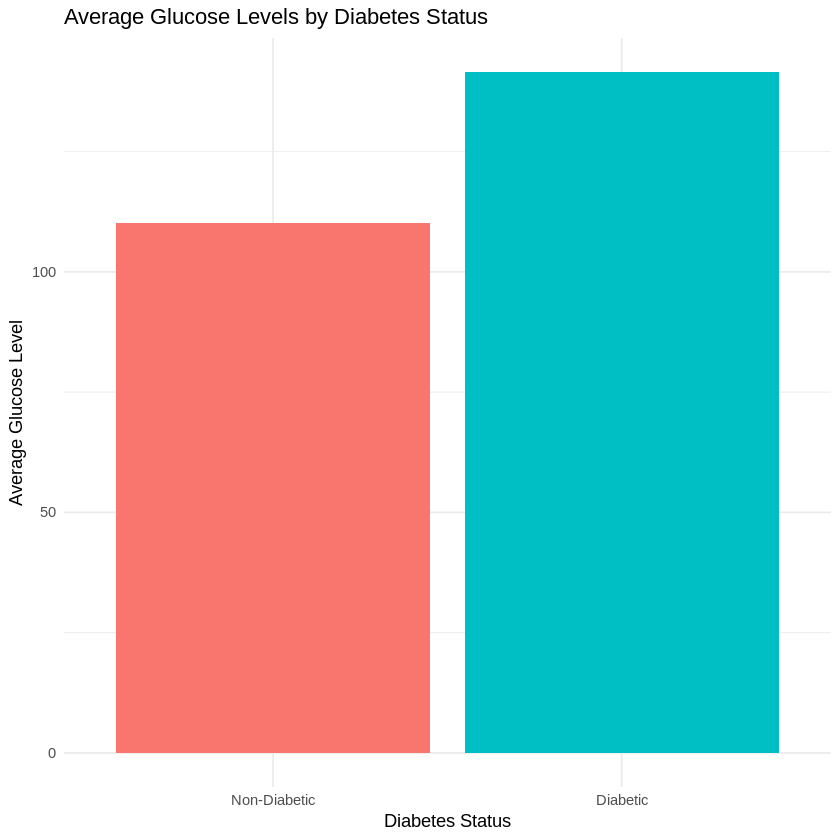

In [ ]:
# Visualizing the average glucose levels
ggplot(glucose_stats, aes(x = as.factor(Outcome), y = Glucose, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average Glucose Levels by Diabetes Status",
       x = "Diabetes Status",
       y = "Average Glucose Level") +
  scale_x_discrete(labels = c("Non-Diabetic", "Diabetic")) +
  theme_minimal()

In [ ]:
# 2. The average age of patients with and without diabetes
age_stats <- aggregate(Age ~ Outcome, data = data, mean)
age_stats

Outcome,Age
<int>,<dbl>
0,31.13500
1,37.05224


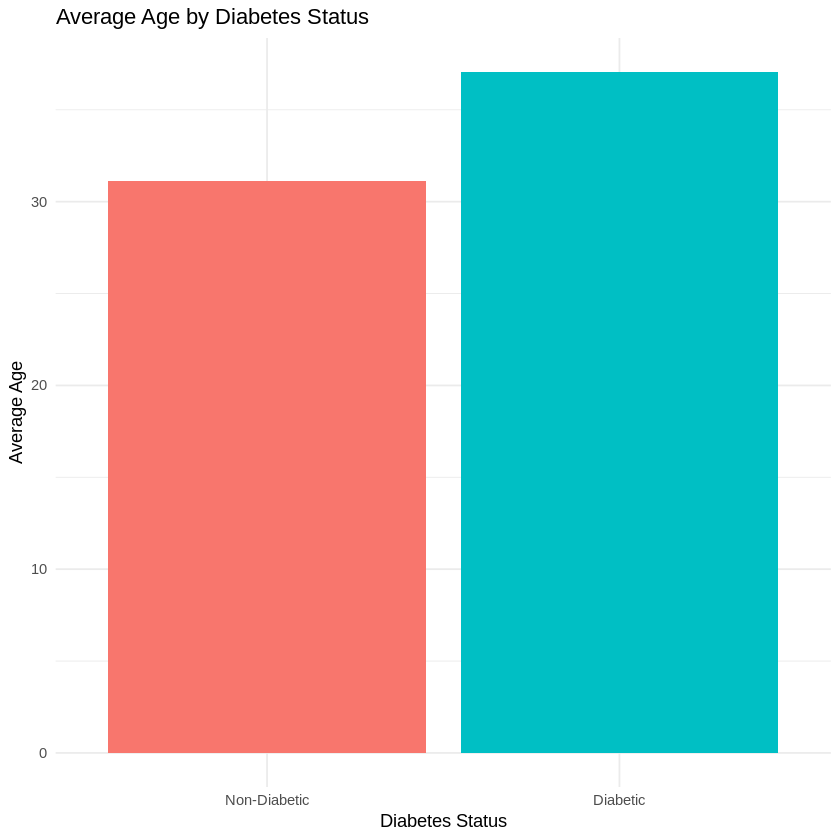

In [ ]:
# Visualizing the average age
ggplot(age_stats, aes(x = as.factor(Outcome), y = Age, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average Age by Diabetes Status",
       x = "Diabetes Status",
       y = "Average Age") +
  scale_x_discrete(labels = c("Non-Diabetic", "Diabetic")) +
  theme_minimal()


In [ ]:
# 3. The average blood pressure measurements across diabetic and non-diabetic groups
bp_stats <-aggregate(BloodPressure ~ Outcome, data = data, mean)

bp_stats

Outcome,BloodPressure
<int>,<dbl>
0,69.5080
1,72.8806


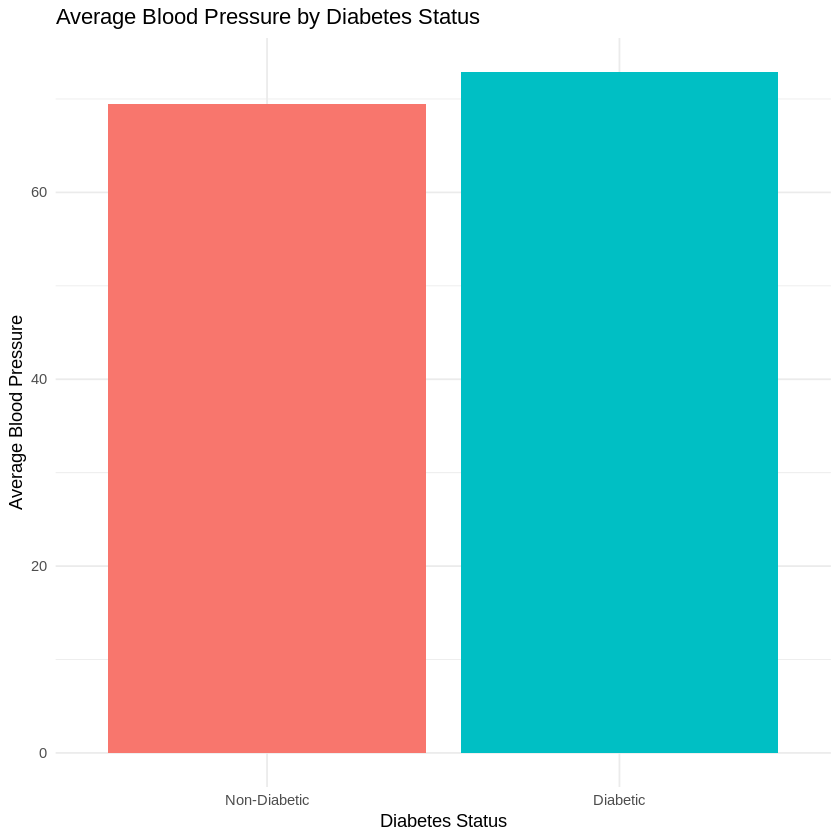

In [ ]:
# Visualizing the average blood pressure measurements
ggplot(bp_stats, aes(x = as.factor(Outcome), y = BloodPressure, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average Blood Pressure by Diabetes Status",
       x = "Diabetes Status",
       y = "Average Blood Pressure") +
  scale_x_discrete(labels = c("Non-Diabetic", "Diabetic")) +
  theme_minimal()


In [ ]:
# 4. The average BMI of diabetic versus non-diabetic patients
bmi_stats <- aggregate(BMI ~ Outcome, data = data, mean)
bmi_stats

Outcome,BMI
<int>,<dbl>
0,30.5275
1,35.1056


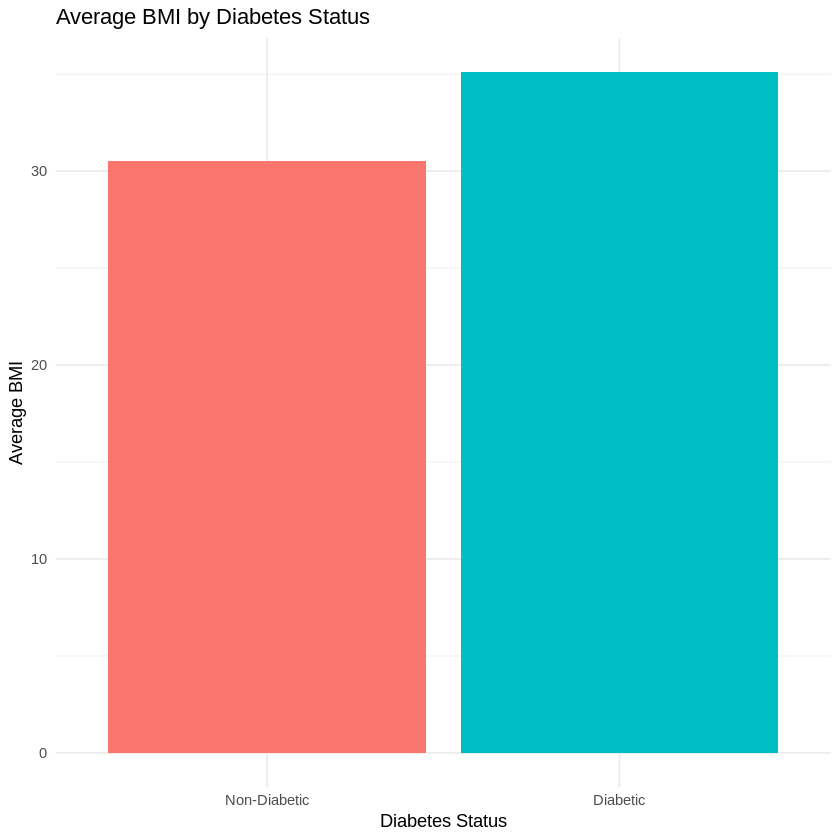

In [ ]:
# Visualizing the average BMI
ggplot(bmi_stats, aes(x = as.factor(Outcome), y = BMI, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Average BMI by Diabetes Status",
       x = "Diabetes Status",
       y = "Average BMI") +
  scale_x_discrete(labels = c("Non-Diabetic", "Diabetic")) +
  theme_minimal()


In [ ]:
# 5. The rate of diabetes among patients in the dataset
diabetes_rate <- diabetes_count / total_patients
diabetes_rate

[1] 0.3489583

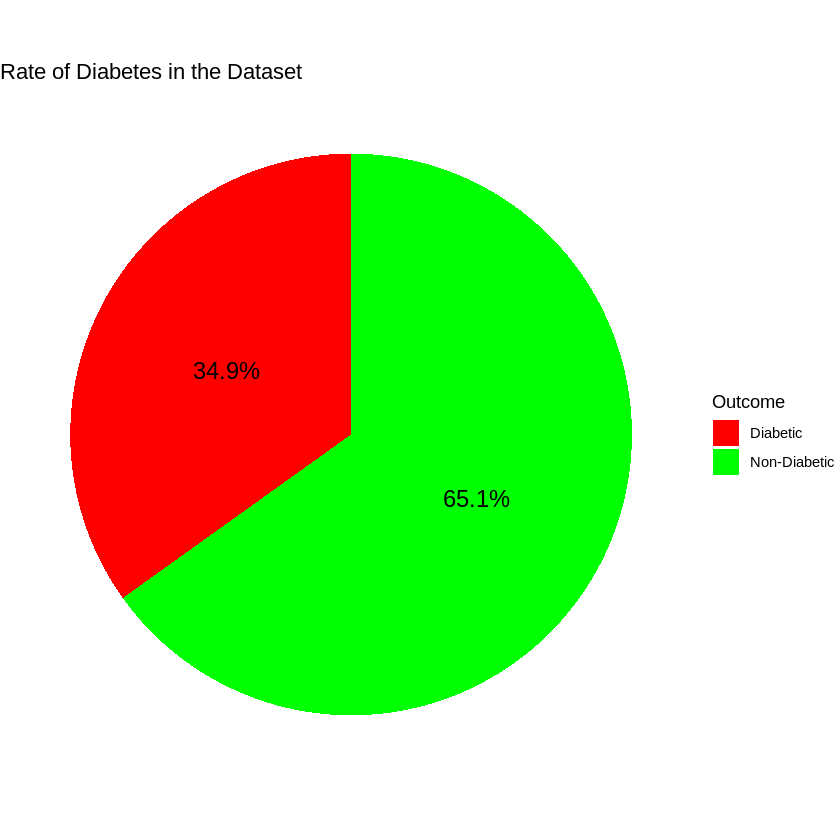

In [ ]:
non_diabetes_count <- total_patients - diabetes_count
diabetes_data <- data.frame(
  Outcome = c("Diabetic", "Non-Diabetic"),
  Count = c(diabetes_count, non_diabetes_count)
)

# Calculate percentages
diabetes_data$Percentage <- (diabetes_data$Count / sum(diabetes_data$Count)) * 100
diabetes_data$Label <- paste0(round(diabetes_data$Percentage, 1), "%")

# Plotting the pie chart with percentage labels
ggplot(diabetes_data, aes(x = "", y = Count, fill = Outcome)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +  # Converts the bar chart to a pie chart
  labs(title = "Rate of Diabetes in the Dataset") +
  theme_void() +  # Removes background and axes
  scale_fill_manual(values = c("red", "green")) +
  geom_text(aes(label = Label),
            position = position_stack(vjust = 0.5),
            size = 5)  # Adds percentage labels


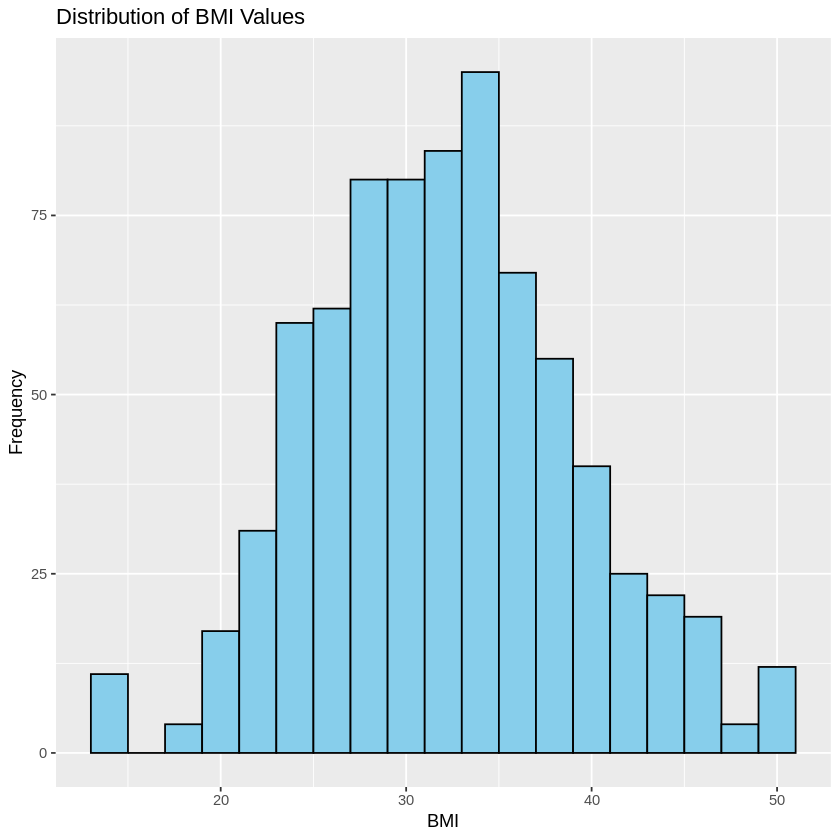

In [ ]:
# 6. The distribution of BMI values among all patients
ggplot(data, aes(x = BMI)) +
  geom_histogram(binwidth = 2, fill = "skyblue", color = "black") +
  labs(title = "Distribution of BMI Values", x = "BMI", y = "Frequency")

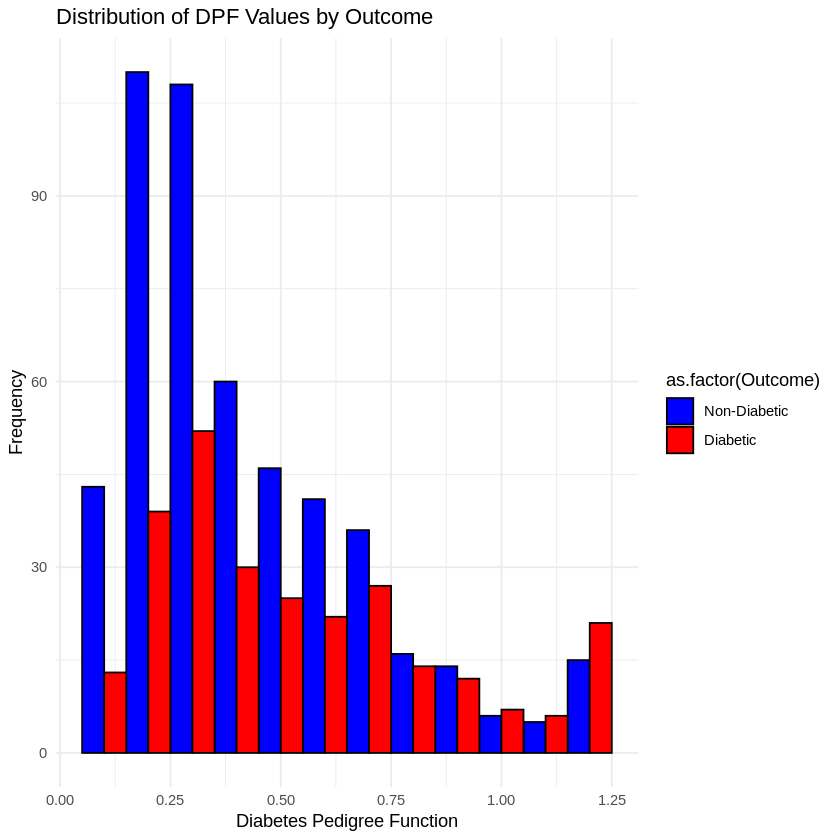

In [ ]:
# 7. The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients
ggplot(data, aes(x = DPF, fill = as.factor(Outcome))) +
  geom_histogram(binwidth = 0.1, color = "black", position = "dodge") +
  labs(title = "Distribution of DPF Values by Outcome", x = "Diabetes Pedigree Function", y = "Frequency") +
  scale_fill_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  theme_minimal()

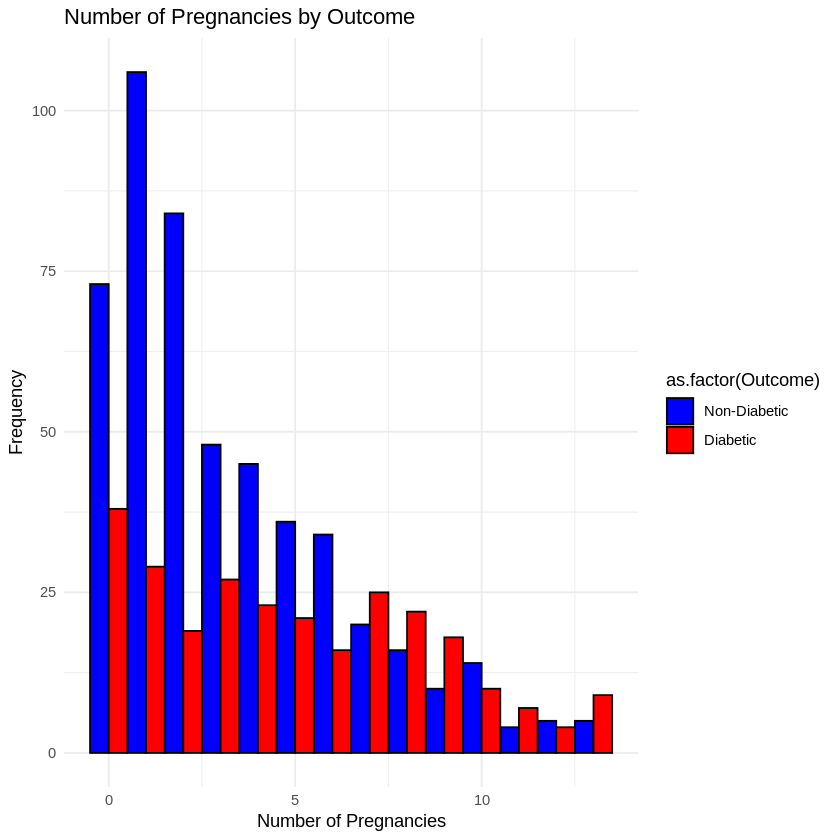

In [ ]:
# 8. The relationship between the number of pregnancies and diabetes occurrence
ggplot(data, aes(x = Pregnancies, fill = as.factor(Outcome))) +
  geom_histogram(binwidth = 1, color = "black", position = "dodge") +
  labs(title = "Number of Pregnancies by Outcome", x = "Number of Pregnancies", y = "Frequency") +
  scale_fill_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  theme_minimal()

[1] "Correlation between Glucose and BMI: 0.235541948374058"


`geom_smooth()` using formula = 'y ~ x'


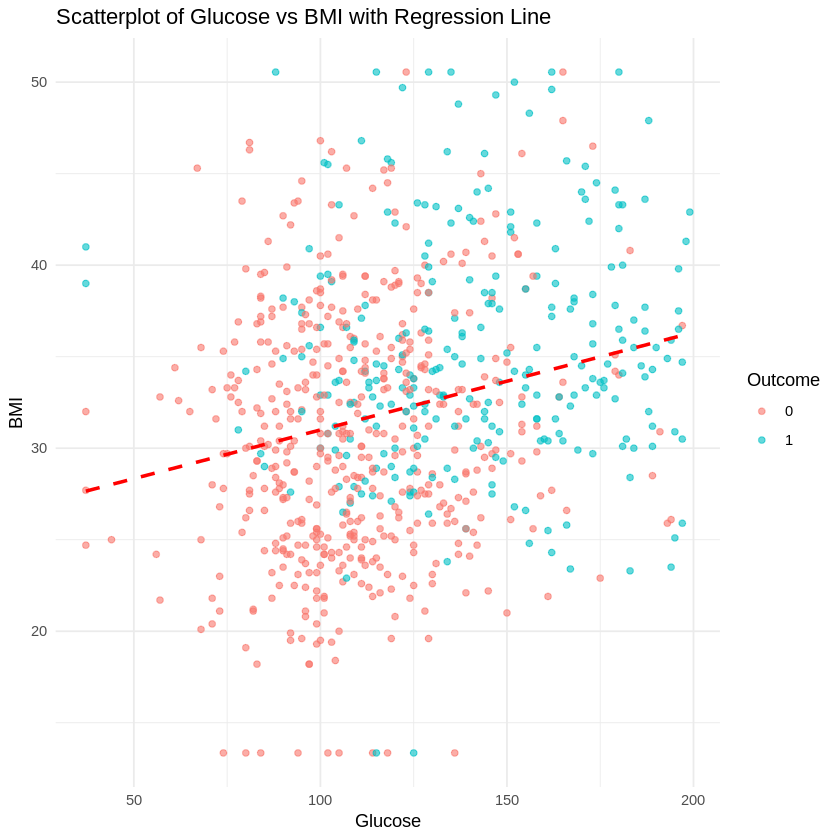

In [ ]:
# 9. The correlation between glucose levels and BMI
correlation <- cor(data$Glucose, data$BMI, use = "complete.obs")
print(paste("Correlation between Glucose and BMI:", correlation))

ggplot(data, aes(x = Glucose, y = BMI)) +
  geom_point(aes(color = as.factor(Outcome)), alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "dashed") +
  labs(
    title = "Scatterplot of Glucose vs BMI with Regression Line",
    x = "Glucose",
    y = "BMI",
    color = "Outcome"
  ) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


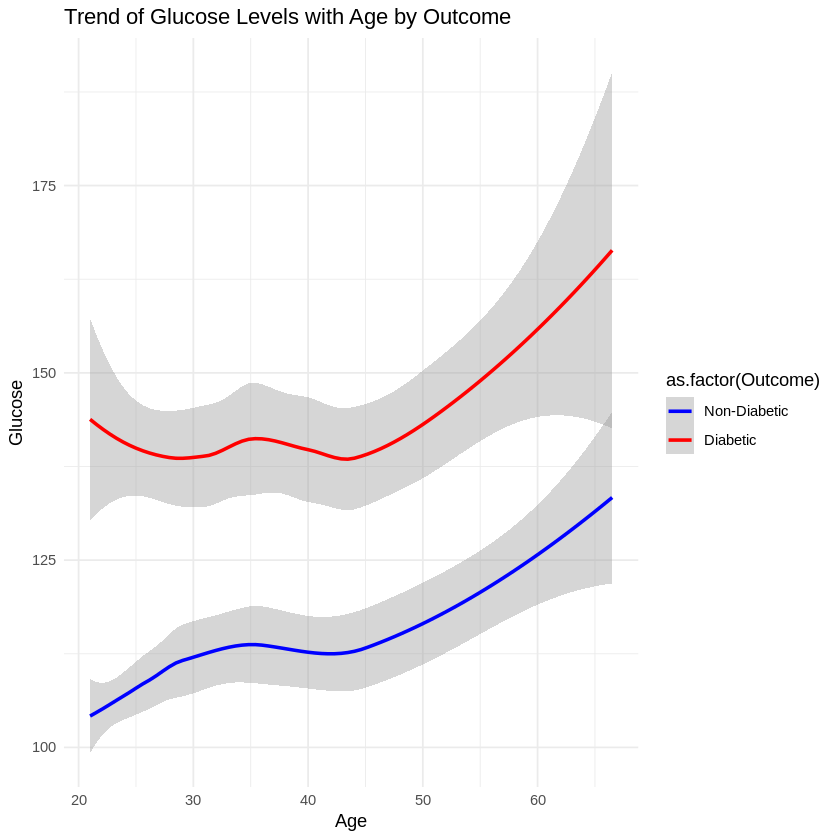

In [ ]:
# 10. The trend of glucose levels with age among diabetic and non-diabetic patients
ggplot(data, aes(x = Age, y = Glucose, color = as.factor(Outcome))) +
  geom_smooth(method = "loess") +
  labs(title = "Trend of Glucose Levels with Age by Outcome", x = "Age", y = "Glucose") +
  scale_color_manual(values = c("blue", "red"), labels = c("Non-Diabetic", "Diabetic")) +
  theme_minimal()


answering quetions



Call:
glm(formula = Outcome ~ Glucose, family = binomial, data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.458238   0.424747  -12.85   <2e-16 ***
Glucose      0.038723   0.003283   11.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.48  on 767  degrees of freedom
Residual deviance: 803.17  on 766  degrees of freedom
AIC: 807.17

Number of Fisher Scoring iterations: 4


`geom_smooth()` using formula = 'y ~ x'


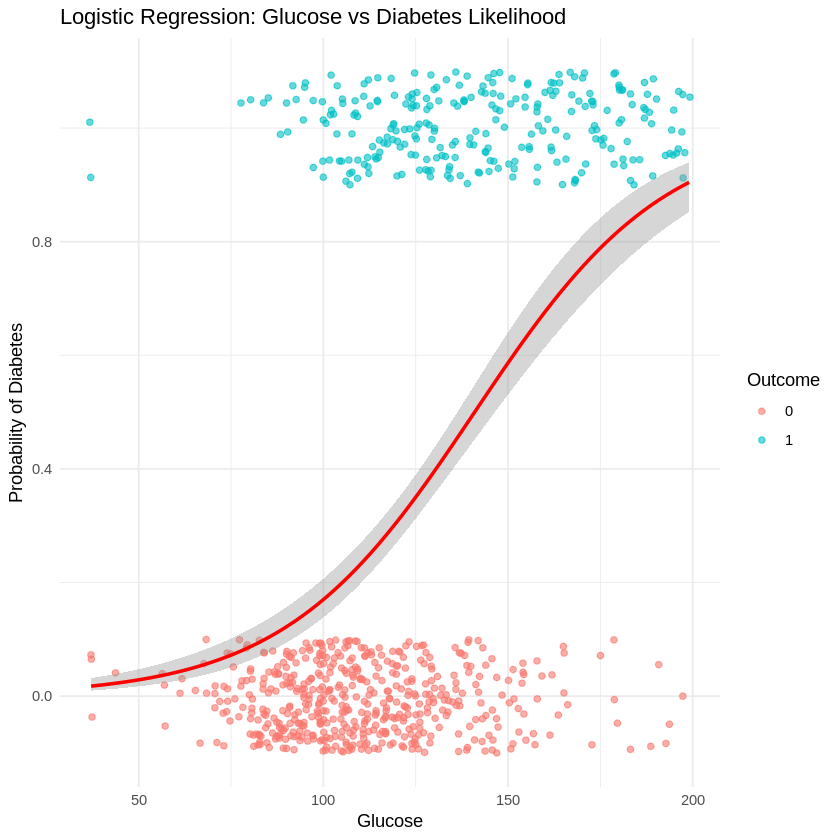

In [ ]:
# 1. Are higher glucose levels associated with a greater likelihood of diabetes?

glucose_diabetes_model <- glm(Outcome ~ Glucose, data = data, family = binomial)
summary(glucose_diabetes_model)

# Plot
ggplot(data, aes(x = Glucose, y = Outcome)) +
  geom_jitter(height = 0.1, aes(color = as.factor(Outcome)), alpha = 0.6) +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") +
  labs(title = "Logistic Regression: Glucose vs Diabetes Likelihood",
       x = "Glucose",
       y = "Probability of Diabetes",
       color = "Outcome") +
  theme_minimal()


[1] "Correlation between Glucose and BMI: 0.24"


`geom_smooth()` using formula = 'y ~ x'


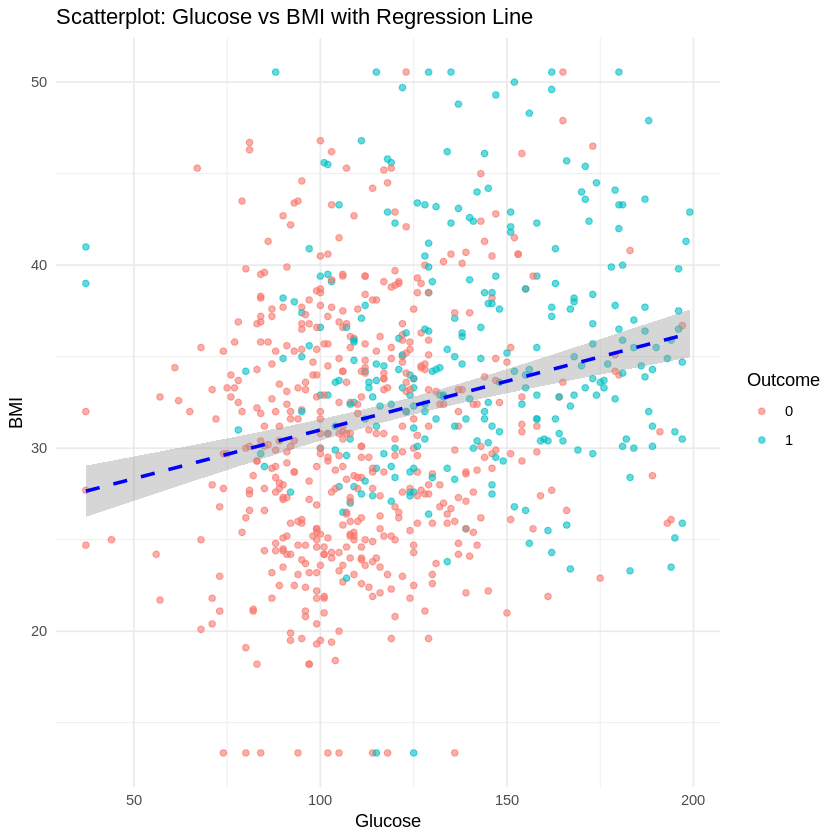

In [ ]:
# 2. Are patients with high glucose concentrations also likely to have higher BMI values?

correlation_glucose_bmi <- cor(data$Glucose, data$BMI, use = "complete.obs")
print(paste("Correlation between Glucose and BMI:", round(correlation_glucose_bmi, 2)))

# Scatter plot
ggplot(data, aes(x = Glucose, y = BMI)) +
  geom_point(aes(color = as.factor(Outcome)), alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "blue", linetype = "dashed") +
  labs(title = "Scatterplot: Glucose vs BMI with Regression Line",
       x = "Glucose",
       y = "BMI",
       color = "Outcome") +
  theme_minimal()




Call:
glm(formula = Outcome ~ Pregnancies, family = binomial, data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.17573    0.12340  -9.528  < 2e-16 ***
Pregnancies  0.13716    0.02302   5.957 2.56e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.48  on 767  degrees of freedom
Residual deviance: 956.71  on 766  degrees of freedom
AIC: 960.71

Number of Fisher Scoring iterations: 4


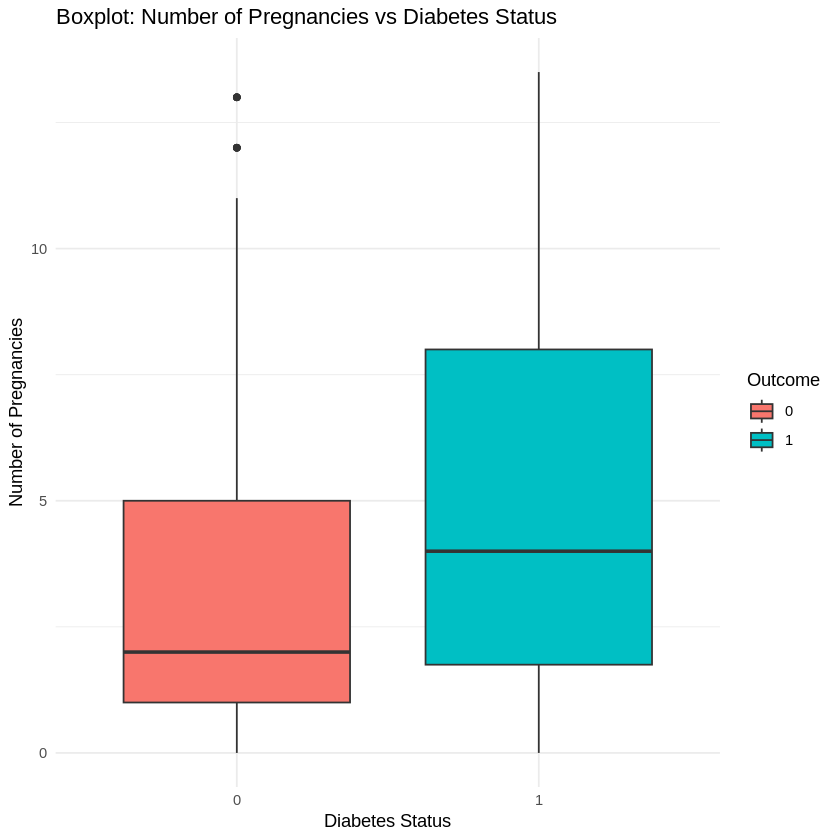

In [ ]:
# 3. Are patients with a higher number of pregnancies at greater risk of developing diabetes?
pregnancy_diabetes_model <- glm(Outcome ~ Pregnancies, data = data, family = binomial)
summary(pregnancy_diabetes_model)

# Box plot
ggplot(data, aes(x = as.factor(Outcome), y = Pregnancies, fill = as.factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Boxplot: Number of Pregnancies vs Diabetes Status",
       x = "Diabetes Status",
       y = "Number of Pregnancies",
       fill = "Outcome") +
  theme_minimal()


[1] "Correlation between Age and Glucose: 0.27"
[1] "Correlation between Age and Insulin: -0.07"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


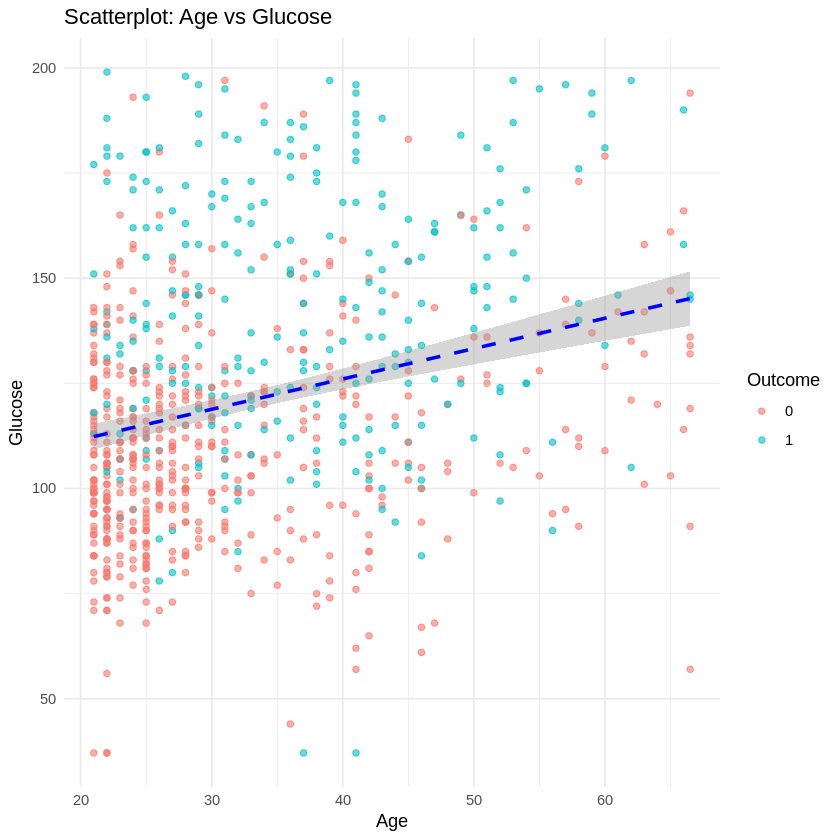

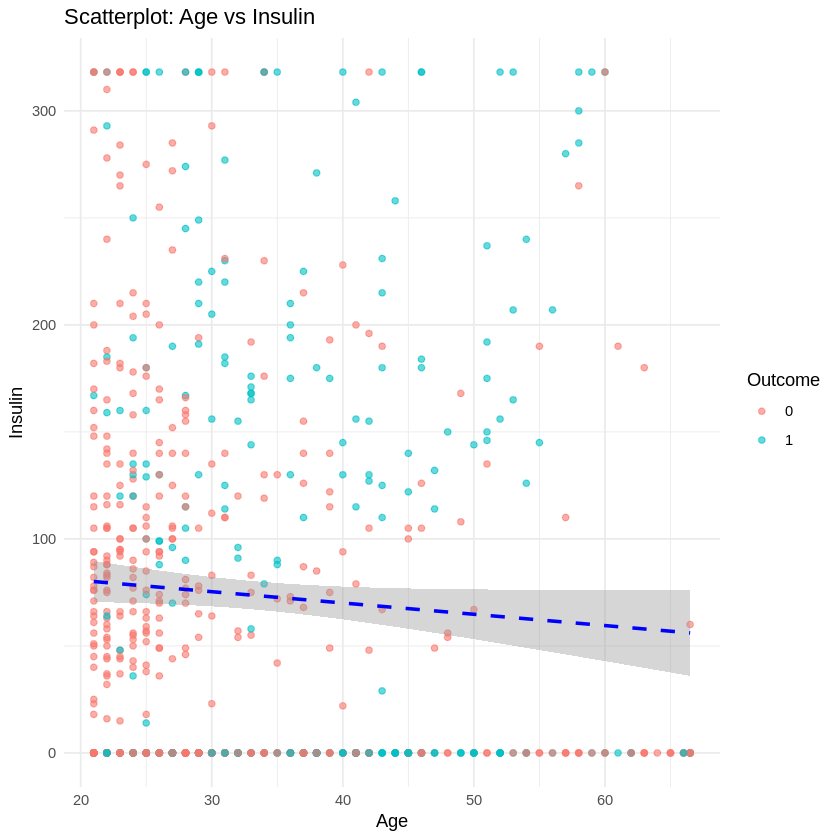

In [ ]:
# 4. Are older patients more likely to have higher insulin concentrations and blood glucose levels?

cor_age_glucose <- cor(data$Age, data$Glucose, use = "complete.obs")
cor_age_insulin <- cor(data$Age, data$Insulin, use = "complete.obs")
print(paste("Correlation between Age and Glucose:", round(cor_age_glucose, 2)))
print(paste("Correlation between Age and Insulin:", round(cor_age_insulin, 2)))

# Scatter plots
ggplot(data, aes(x = Age, y = Glucose)) +
  geom_point(aes(color = as.factor(Outcome)), alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "blue", linetype = "dashed") +
  labs(title = "Scatterplot: Age vs Glucose",
       x = "Age",
       y = "Glucose",
       color = "Outcome") +
  theme_minimal()

ggplot(data, aes(x = Age, y = Insulin)) +
  geom_point(aes(color = as.factor(Outcome)), alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "blue", linetype = "dashed") +
  labs(title = "Scatterplot: Age vs Insulin",
       x = "Age",
       y = "Insulin",
       color = "Outcome") +
  theme_minimal()


# A tibble: 2 × 5
  Outcome Mean_Glucose Mean_BMI Mean_Age Mean_Pregnancies
    <int>        <dbl>    <dbl>    <dbl>            <dbl>
1       0         110.     30.5     31.1             3.30
2       1         142.     35.1     37.1             4.84


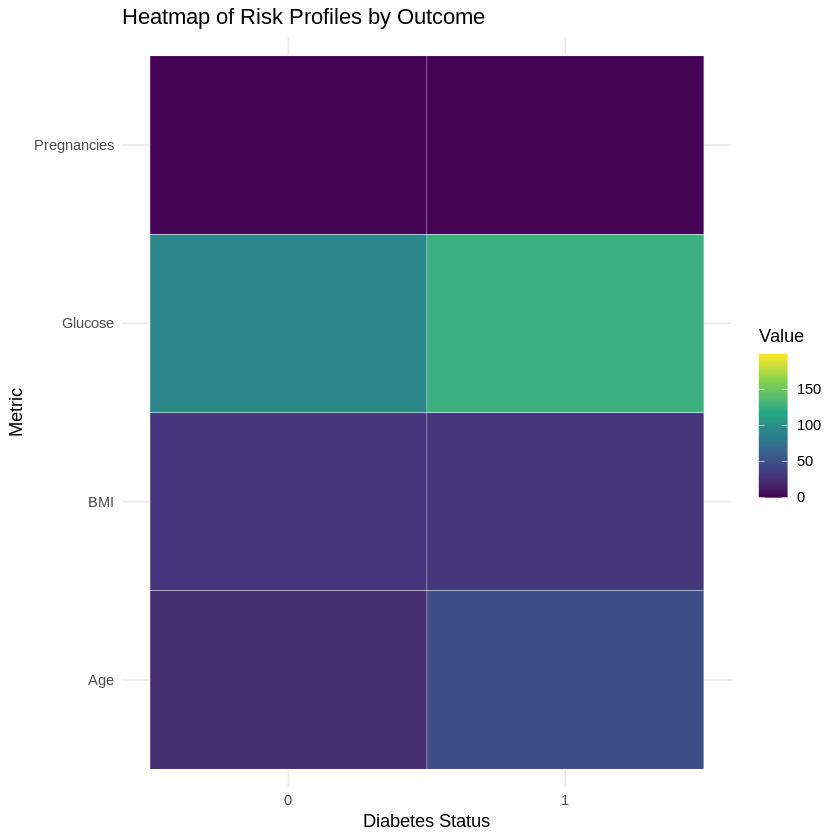

In [ ]:
# 5. Can you identify common “risk profiles” for diabetic patients based on key metrics (glucose, BMI, age, etc.)?
# Summarize key metrics for diabetic vs non-diabetic groups
risk_profiles <- data %>%
  group_by(Outcome) %>%
  summarize(
    Mean_Glucose = mean(Glucose, na.rm = TRUE),
    Mean_BMI = mean(BMI, na.rm = TRUE),
    Mean_Age = mean(Age, na.rm = TRUE),
    Mean_Pregnancies = mean(Pregnancies, na.rm = TRUE),
    .groups = "drop"
  )
print(risk_profiles)

# Heatmap of key metrics
data_long <- data %>%
  pivot_longer(cols = c(Glucose, BMI, Age, Pregnancies), names_to = "Metric", values_to = "Value")

ggplot(data_long, aes(x = as.factor(Outcome), y = Metric, fill = Value)) +
  geom_tile(color = "white") +
  scale_fill_viridis_c() +
  labs(title = "Heatmap of Risk Profiles by Outcome",
       x = "Diabetes Status",
       y = "Metric",
       fill = "Value") +
  theme_minimal()




other questions


[1] "Correlation between Insulin and BMI: 0.21"


`geom_smooth()` using formula = 'y ~ x'


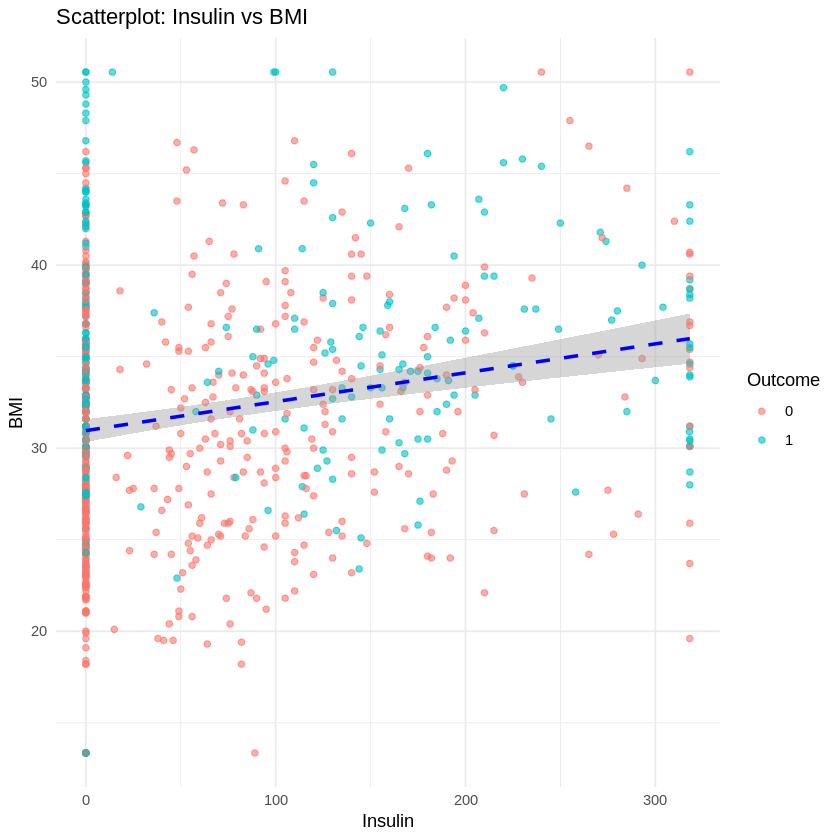

In [ ]:
# 1. Is there a relationship between insulin levels and BMI?

cor_insulin_bmi <- cor(data$Insulin, data$BMI, use = "complete.obs")
print(paste("Correlation between Insulin and BMI:", round(cor_insulin_bmi, 2)))

ggplot(data, aes(x = Insulin, y = BMI)) +
  geom_point(aes(color = as.factor(Outcome)), alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "blue", linetype = "dashed") +
  labs(title = "Scatterplot: Insulin vs BMI",
       x = "Insulin",
       y = "BMI",
       color = "Outcome") +
  theme_minimal()


[1] "Correlation between BMI and DiabetesPF: 0.21"


`geom_smooth()` using formula = 'y ~ x'


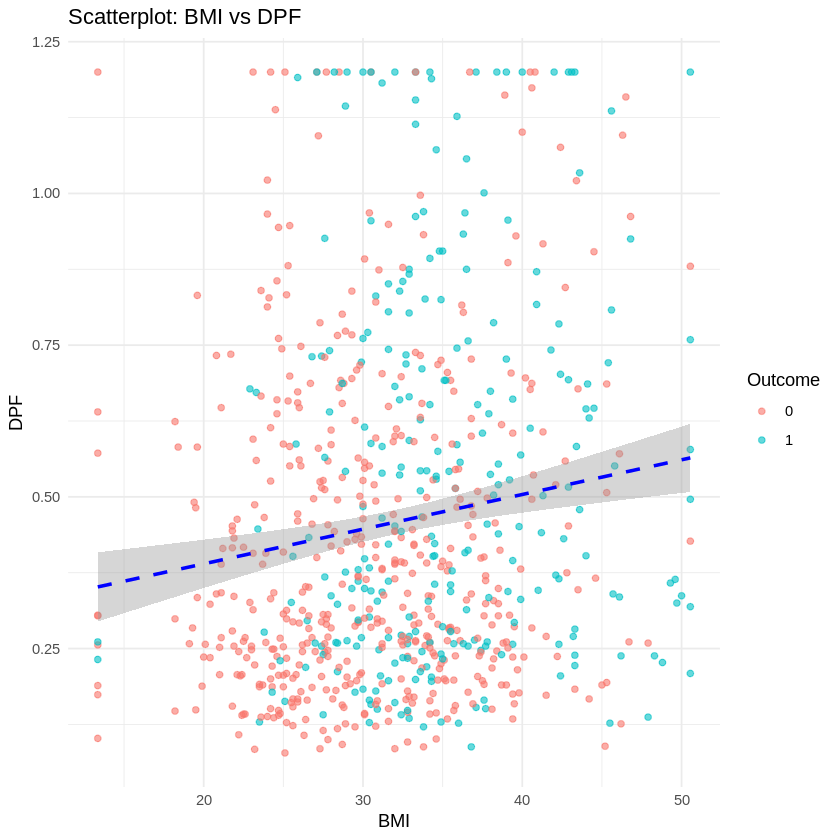

In [ ]:
# 2. Are patients with higher BMI also more likely to have a higher diabetes pedigree function?

cor_bmi_DiabetesPF <- cor(data$BMI, data$DPF, use = "complete.obs")
print(paste("Correlation between BMI and DiabetesPF:", round(cor_insulin_bmi, 2)))

ggplot(data, aes(x = BMI, y = DPF)) +
  geom_point(aes(color = as.factor(Outcome)), alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "blue", linetype = "dashed") +
  labs(title = "Scatterplot: BMI vs DPF",
       x = "BMI",
       y = "DPF",
       color = "Outcome") +
  theme_minimal()


# A tibble: 2 × 6
  Outcome Mean_Age Median_Age Min_Age Max_Age SD_Age
    <int>    <dbl>      <dbl>   <dbl>   <dbl>  <dbl>
1       0     31.1         27      21    66.5   11.5
2       1     37.1         36      21    66.5   10.9


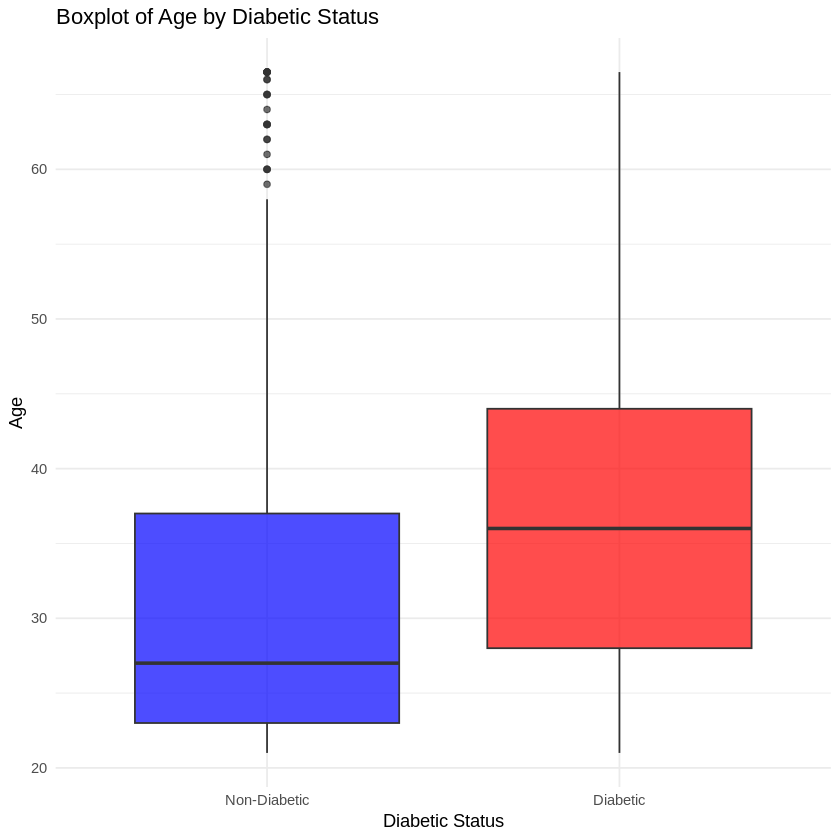

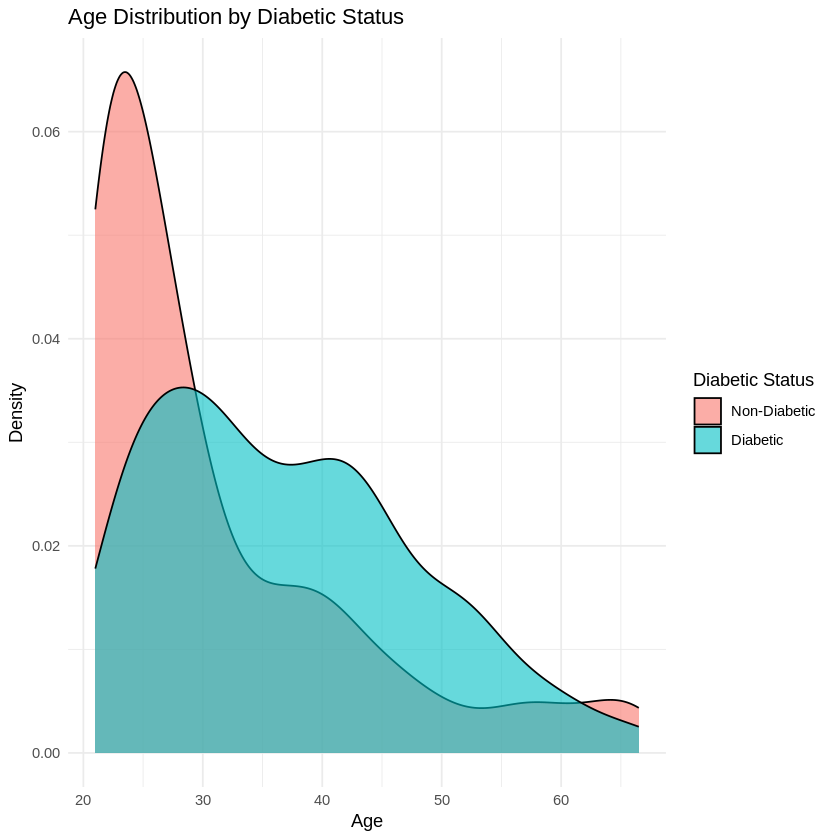

In [ ]:
# 3. How does the age distribution differ between diabetic and non-diabetic patients?

age_summary <- data %>%
  group_by(Outcome) %>%
  summarize(
    Mean_Age = mean(Age, na.rm = TRUE),
    Median_Age = median(Age, na.rm = TRUE),
    Min_Age = min(Age, na.rm = TRUE),
    Max_Age = max(Age, na.rm = TRUE),
    SD_Age = sd(Age, na.rm = TRUE)
  )
print(age_summary)

ggplot(data = data, aes(x = factor(Outcome, labels = c("Non-Diabetic", "Diabetic")), y = Age)) +
  geom_boxplot(fill = c("blue", "red"), alpha = 0.7) +
  labs(
    title = "Boxplot of Age by Diabetic Status",
    x = "Diabetic Status",
    y = "Age"
  ) +
  theme_minimal()

ggplot(data = data, aes(x = Age, fill = factor(Outcome, labels = c("Non-Diabetic", "Diabetic")))) +
  geom_density(alpha = 0.6) +
  labs(
    title = "Age Distribution by Diabetic Status",
    x = "Age",
    y = "Density",
    fill = "Diabetic Status"
  ) +
  theme_minimal()

[1] "Correlation between BMI and Glucose in pregnant women: 0.21"


`geom_smooth()` using formula = 'y ~ x'


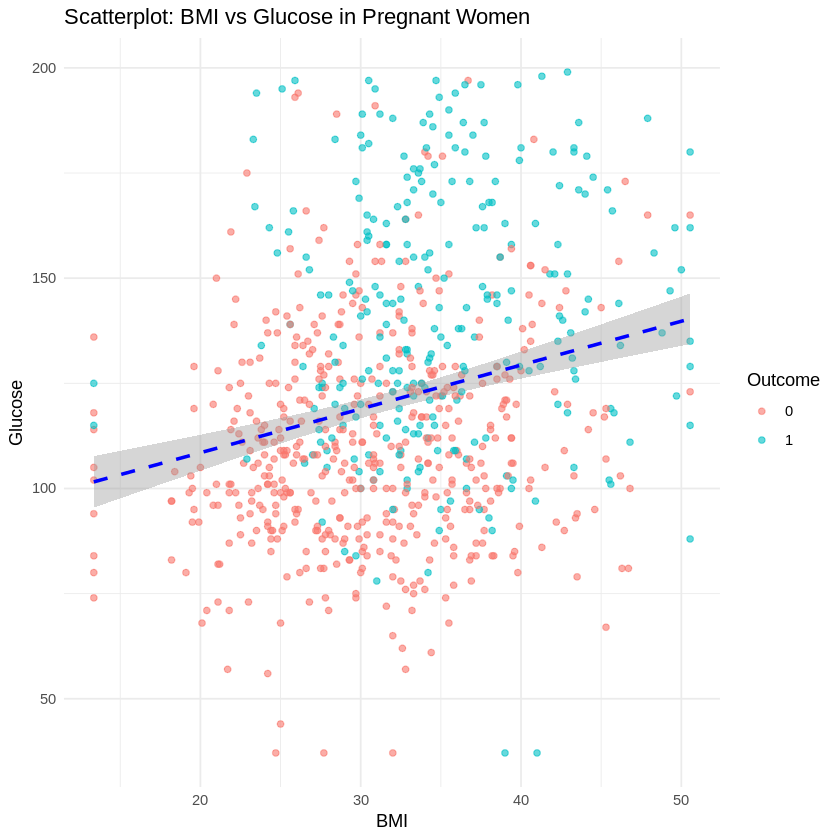

In [ ]:
# 4. Do pregnant women with a higher BMI tend to have higher glucose levels?

pregnant_data <- data %>% filter(Pregnancies > 0)

cor_bmi_Glucose <- cor(pregnant_data$BMI, pregnant_data$Glucose, use = "complete.obs")
print(paste("Correlation between BMI and Glucose in pregnant women:", round(cor_bmi_Glucose, 2)))

ggplot(data, aes(x = BMI, y = Glucose)) +
  geom_point(aes(color = as.factor(Outcome)), alpha = 0.6) +
  geom_smooth(method = "lm", se = TRUE, color = "blue", linetype = "dashed") +
  labs(title = "Scatterplot: BMI vs Glucose in Pregnant Women",
       x = "BMI",
       y = "Glucose",
       color = "Outcome") +
  theme_minimal()

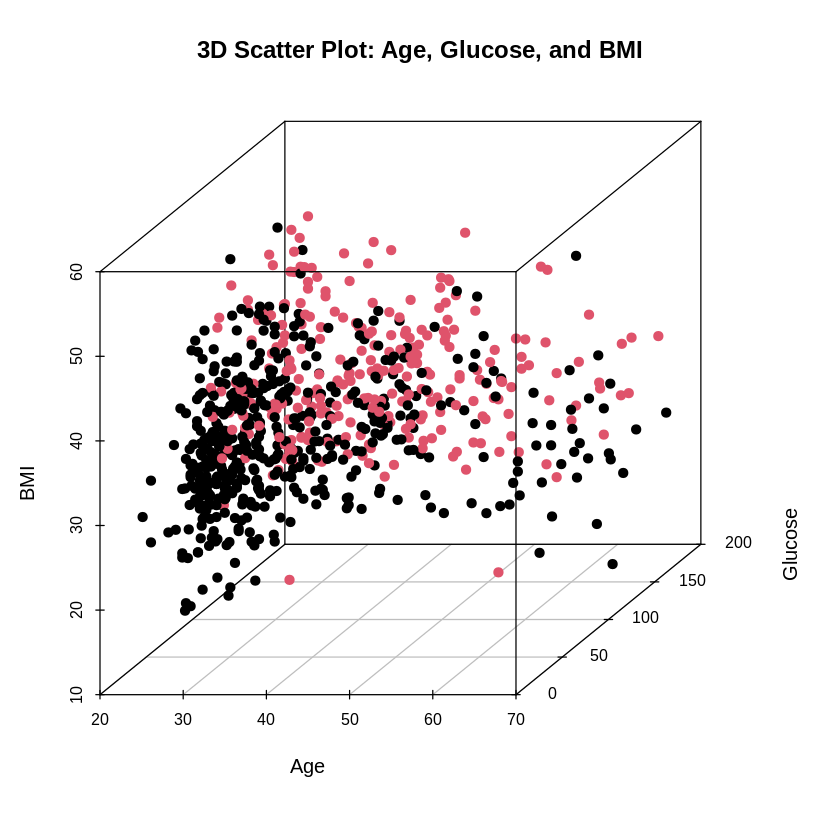

In [ ]:
# 5. Can age, glucose, and BMI together predict the likelihood of diabetes?

scatterplot3d(
  data$Age,
  data$Glucose,
  data$BMI,
  color = as.numeric(data$Outcome) +1 ,
  pch = 19,
  xlab = "Age",
  ylab = "Glucose",
  zlab = "BMI",
  main = "3D Scatter Plot: Age, Glucose, and BMI"
)

Hypothesis Testing

In [ ]:
# Claim: “There is a significant difference in glucose levels between diabetic and non-diabetic patients.”

t_test <- t.test(Glucose ~ Outcome, data = data, var.equal = TRUE)
print(t_test)

p_value <- t_test$p.value
cat("P-value:", p_value)

# The claim is valid since the p_value is smaller than 0.05, we reject null hypothesis.


	Two Sample t-test

data:  Glucose by Outcome
t = -15.109, df = 766, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -35.40263 -27.26090
sample estimates:
mean in group 0 mean in group 1 
       110.2027        141.5345 

P-value: 2.46196e-45

other hypothesis Testing

In [ ]:
# Claim: "There is a significant difference in Insulin level between diabetic and non-diabetic patients."

t_test_insulin <- t.test(Insulin ~ Outcome, data = data, var.equal = TRUE)
print(t_test_insulin)

p_value <- t_test_insulin$p.value
cat("P-value:", p_value)

# The claim is valid since the p_value is smaller than 0.05, we reject null hypothesis.


	Two Sample t-test

data:  Insulin by Outcome
t = -3.479, df = 766, p-value = 0.0005317
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -38.27697 -10.66251
sample estimates:
mean in group 0 mean in group 1 
       65.11375        89.58349 

P-value: 0.0005316746

Simulation Task


In [ ]:
# Take 25 Random Samples of Size 15 from the Dataset

column <- data$BMI
population_mean <- mean(column)
ci <- numeric(25)

for (i in 1:25){
  sample_data <- sample(column, size = 15, replace = TRUE)
  sample_mean <- mean(sample_data)
  SE <- sd(sample_data) / sqrt(length(sample_data))
  error_margin <- qt(0.975, df = length(sample_data) - 1) * SE
  lower_bound <- sample_mean - error_margin
  upper_bound <- sample_mean + error_margin

  if (lower_bound <= population_mean && upper_bound >= population_mean){
    ci[i] <- 1
  }
  else{
    ci[i] <- 0
  }

}

proportion <- mean(ci)
print(proportion)

[1] 0.92


In [ ]:
# Increase the Sample Size to 100

column <- data$BMI
population_mean <- mean(column)
ci_100 <- numeric(25)
ci_width_100 <- numeric(25)

for (i in 1:25){
  sample_data <- sample(column, size = 100, replace = TRUE)
  sample_mean <- mean(sample_data)
  SE <- sd(sample_data) / sqrt(length(sample_data))
  error_margin <- qt(0.975, df = length(sample_data) - 1) * SE
  lower_bound <- sample_mean - error_margin
  upper_bound <- sample_mean + error_margin

  ci_width_100[i] <- upper_bound - lower_bound

  if (lower_bound <= population_mean && upper_bound >= population_mean){
    ci_100[i] <- 1
  }
  else{
    ci_100[i] <- 0
  }

}

proportion <- mean(ci_100)
print(proportion)
average_width <- mean(ci_width_100)
print(average_width)

[1] 0.96
[1] 2.795041


In [ ]:
# Take 20 Random Samples of Size 10 from the Dataset

column <- data$BMI
population_mean <- mean(column)
ci <- numeric(20)

for (i in 1:20){
  sample_data <- sample(column, size = 10, replace = TRUE)
  sample_mean <- mean(sample_data)
  SE <- sd(sample_data) / sqrt(length(sample_data))
  error_margin <- qt(0.975, df = length(sample_data) - 1) * SE
  lower_bound <- sample_mean - error_margin
  upper_bound <- sample_mean + error_margin

  if (lower_bound <= population_mean && upper_bound >= population_mean){
    ci[i] <- 1
  }
  else{
    ci[i] <- 0
  }

}

proportion <- mean(ci)
print(proportion)

[1] 0.9
